In [ ]:
%matplotlib inline
## Подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import warnings
## Настройки для графиков
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

   No    t[s]    T[C]  U+_SiPM[V]  U-_SiPM[V]  Vert.angl[grad].  \
0   1  13.677  22.278       3.289     -23.714                90   
1   2  15.686  22.233       3.289     -23.713                90   

   Hor.angl[grad]  I_SiPM[uA]  I0_SiPM[uA]  I_SiPM_uA  
0               0       0.675        0.644      0.031  
1               2       0.759        0.570      0.189  
[90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
        No      t[s]    T[C]  U+_SiPM[V]  U-_SiPM[V]  Vert.angl[grad].  \
0        1    13.677  22.278       3.289     -23.714                90   
1        2    15.686  22.233       3.289     -23.713                90   
2        3    17.687  22.253       3.289     -23.713                90   
3        4    19.692  22.203       3.289     -23.711                90   
4        5    21.701  22.170       3.289     -23.712                90   
...    ...       ...     ...         ...         ...               ...   
1986  1987  4092.546  21.906       3.289     -23.722          

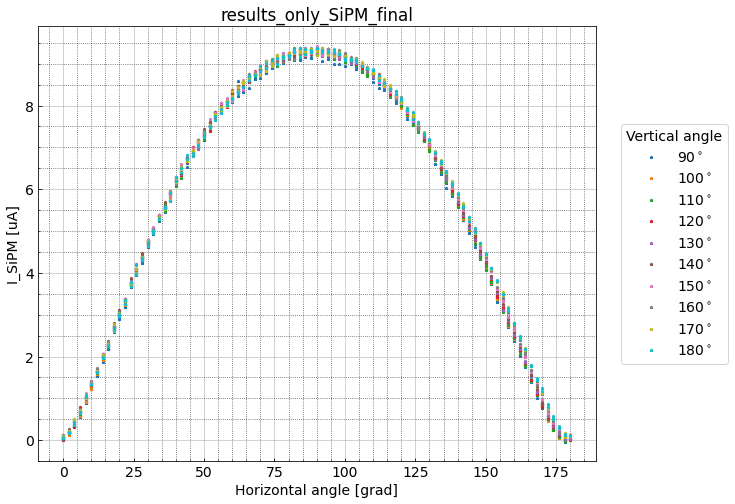

In [ ]:
# read clear data file to pandas dataframe
def clear_read_and_plot(file):
    filename = './clear_' + file
    datum = pd.read_csv(filename, index_col=False, sep='\s+', skiprows=10)
    datum["I_SiPM_uA"] = datum["I_SiPM[uA]"] - datum["I0_SiPM[uA]"]
    print(datum.head(2))

    ## plot horizontal angle distributions
    fig, axn = plt.subplots(figsize=(10, 8))
    grads = sorted([x[0] for x in datum["Vert.angl[grad]."].value_counts().items()])
    print(grads)
    for grad in grads:
        data = datum[datum["Vert.angl[grad]."] == grad] 
        ax = "Hor.angl[grad]"
        ## вычитаем пьедестал по току
        yy = data["I_SiPM[uA]"] - data ["I0_SiPM[uA]"]
        plt.plot(data[ax], yy, '*', label=str(grad)+'$^\circ$')
    # Легенда, оси, заголовок
    plt.legend(loc="center right", bbox_to_anchor=(1.25,0.5),
                title="Vertical angle")
    plt.xlabel("Horizontal angle [grad]")
    plt.ylabel("I_SiPM [uA]")
    plt.title(filename[8:-4])
    # сетка
    plt.minorticks_on()
    plt.grid()
    # Внешний вид линий вспомогательной сетки:
    plt.grid(which='minor', color = 'k', linestyle = ':')

    print(datum)
    data = datum[datum["Vert.angl[grad]."] == 90]
    newdata = data[['Hor.angl[grad]','I_SiPM_uA']]
    print(newdata)
   

clear_read_and_plot("results_only_SiPM_final.txt")  

        No      t[s]    T[C]  U+_SiPM[V]  U-_SiPM[V]  Vert.angl[grad].  \
0        1    13.677  22.278       3.289     -23.714                90   
1        2    15.686  22.233       3.289     -23.713                90   
2        3    17.687  22.253       3.289     -23.713                90   
3        4    19.692  22.203       3.289     -23.711                90   
4        5    21.701  22.170       3.289     -23.712                90   
...    ...       ...     ...         ...         ...               ...   
1986  1987  4092.546  21.906       3.289     -23.722                90   
1987  1988  4094.546  21.869       3.288     -23.724                90   
1988  1989  4096.547  21.868       3.288     -23.718                90   
1989  1990  4098.547  21.844       3.289     -23.719                90   
1990  1991  4100.547  21.915       3.289     -23.721                90   

      Hor.angl[grad]  I_SiPM[uA]  I0_SiPM[uA]  
0                  0       0.675        0.644  
1              

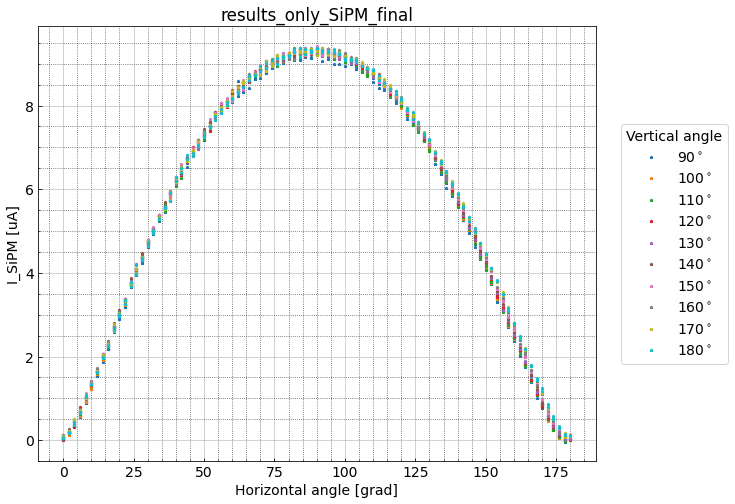

In [ ]:
clear_read_and_plot("results_only_SiPM_final.txt")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29d69147-c483-44f1-9c27-9c61510e33f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>